<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
#Permite trabajar con cálculo simbólico.

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model #Crear modelo de NN
from tensorflow.keras.layers import Input, Dense, Flatten, concatenate

import matplotlib.pyplot as plt
import numpy as np

In [3]:
num_classes = 10
img_rows, img_columns = 28, 28
num_channeels = 1
input_shape = (img_rows, img_columns, num_channeels)

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data();
X_train, X_test = X_train/255, X_test/255
X_train.shape

11501568/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

3


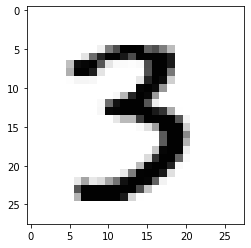

In [5]:
image_index = 10000
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap = 'Greys');

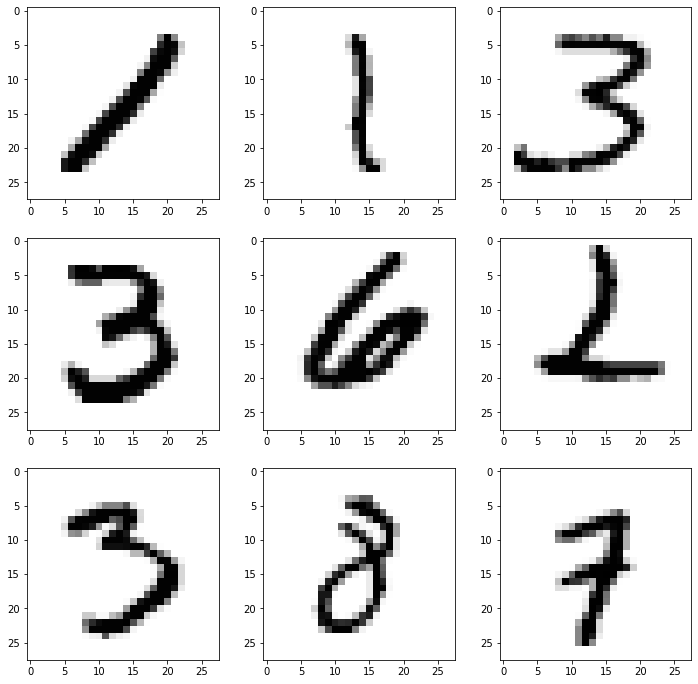

In [6]:
plt.figure(figsize = (12, 12))
k = 0
idx = np.random.randint(0, 59999, 9)
for i in idx:
  plt.subplot(3,3,k+1)
  plt.imshow(X_train[i], cmap = 'Greys')
  k+=1

In [7]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu')) #Capas intermedias.
model.add(Dense(num_classes, activation = 'softmax')) #Capas de salida.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs = 20, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6511 - accuracy: 0.8350 - val_loss: 0.3570 - val_accuracy: 0.9050
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3394 - accuracy: 0.9046 - val_loss: 0.2919 - val_accuracy: 0.9200
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2919 - accuracy: 0.9182 - val_loss: 0.2611 - val_accuracy: 0.9277
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2622 - accuracy: 0.9263 - val_loss: 0.2380 - val_accuracy: 0.9343
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - accuracy: 0.9328 - val_loss: 0.2198 - val_accuracy: 0.9387
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2205 - accuracy: 0.9384 - val_loss: 0.2045 - val_accuracy: 0.9442
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2049 - accuracy: 0.9428 - val_loss: 0.1923 - val_accuracy:

In [13]:
#Para guardar modelo entrenado. Transferencia de aprendizaje.
model.save('modelo1.h5')
model1 = tf.keras.models.load_model('modelo1.h5')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
#NO guardar el modelo, sino guardar los pesos.
model.save_weights('modelpesos.h5')

In [15]:
model.load_weights('modelpesos.h5')

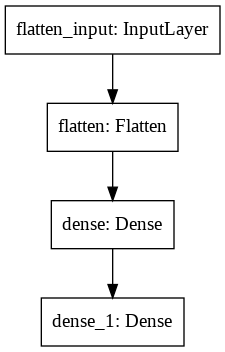

In [18]:
plot_model(model, to_file = 'ann1.png')